In [1]:
import datetime
print(f"the date is {datetime.datetime.now()}")

the date is 2025-06-15 18:26:57.266627


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# let's encoding data
insurance_encod = pd.get_dummies(insurance, dtype= int)

In [6]:
insurance_encod.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [7]:
X = insurance_encod.drop("charges", axis= 1)
y= insurance_encod["charges"]

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [12]:
len(X_train), len(X_test)

(1070, 268)

In [13]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10290.8975 - mae: 10290.8975
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7568.1484 - mae: 7568.1484
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7540.6792 - mae: 7540.6792
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7479.8828 - mae: 7479.8828
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7836.3223 - mae: 7836.3223
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7587.1196 - mae: 7587.1196 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7395.9829 - mae: 7395.9829
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7735.7144 - mae: 7735.7144
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7099.8301 - mae: 7099.8301
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7442.0117 - mae: 7442.0117 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7314.9995 - mae: 7314.9995
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [14]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6810.0850 - mae: 6810.0850  


[6560.70751953125, 6560.70751953125]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

## **Improving our model**

In [16]:
# Build improved model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile with better settings
insurance_model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse']
)

insurance_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 334196256.0000 - mae: 13805.6914 - mse: 334196256.0000 - val_loss: 310021600.0000 - val_mae: 12642.8682 - val_mse: 310021600.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 309511520.0000 - mae: 12985.6387 - mse: 309511520.0000 - val_loss: 309046656.0000 - val_mae: 12607.2080 - val_mse: 309046656.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 333342656.0000 - mae: 13661.7705 - mse: 333342656.0000 - val_loss: 306060960.0000 - val_mae: 12497.5459 - val_mse: 306060960.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 352222336.0000 - mae: 13753.1172 - mse: 352222336.0000 - val_loss: 298112032.0000 - val_mae: 12200.7607 - val_mse: 298112032.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 279549888.0000 - mae: 12134.4990 - mse: 279549888.0000 - val_loss: 280020576.0000 - val_mae: 11497.2734 - val_mse: 280020576.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2820297

In [17]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42924776.0000 - mae: 5008.0059 - mse: 42924776.0000 


[46411728.0, 5112.82373046875, 46411728.0]

In [18]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # 100 units
  tf.keras.layers.Dense(10, activation='relu'), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13259.0244 - mae: 13259.0244
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11708.5303 - mae: 11708.5303
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7513.0117 - mae: 7513.0117
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7351.6929 - mae: 7351.6929
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7241.6191 - mae: 7241.6191
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7134.7925 - mae: 7134.7925
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7022.2227 - mae: 7022.2227
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6890.6357 - mae: 6890.6357
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6744.9399 - mae: 6744.9399
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6577.8994 - mae: 6577.8994
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6412.7915 - mae: 6412.7915
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [19]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1719.0533 - mae: 1719.0533  


[1761.864990234375, 1761.864990234375]

Text(0.5, 0, 'epochs')

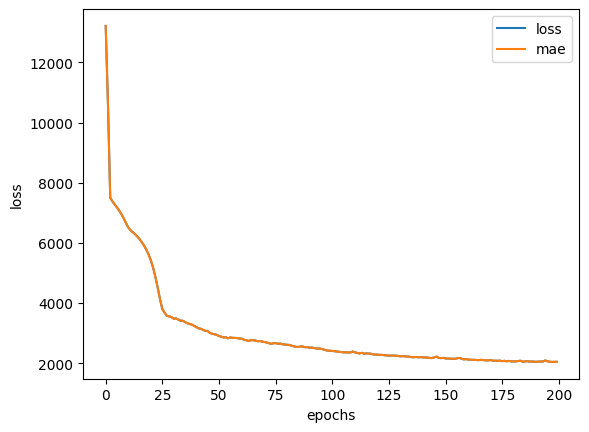

In [20]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## **Preprocessing data (normalization and standardization)**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [22]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [26]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]


,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [27]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [28]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [29]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [30]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3213.7239 - mae: 3213.7239  


## **🛠 Exercises**
We've a covered a whole lot pretty quickly.

So now it's time to have a play around with a few things and start to build up your intuition.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [24]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the customer dataset
adult_data = fetch_openml(name='adult', version=2, as_frame=True)
df_customer = adult_data.frame

# Select numeric columns for normalization
numeric_cols = df_customer.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns to normalize:", numeric_cols.tolist())

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_customer[numeric_cols])

# Create normalized dataset
df_customer_normalized = df_customer.copy()
df_customer_normalized[numeric_cols] = scaled_features

df_customer_normalized

Numeric columns to normalize: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,-0.995129,Private,0.351675,11th,-1.197259,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.144804,-0.217127,-0.034087,United-States,<=50K
1,-0.046942,Private,-0.945524,HS-grad,-0.419335,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.144804,-0.217127,0.772930,United-States,<=50K
2,-0.776316,Local-gov,1.394723,Assoc-acdm,0.747550,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
3,0.390683,Private,-0.277844,Some-college,-0.030373,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.886874,-0.217127,-0.034087,United-States,>50K
4,-1.505691,NaN,-0.815954,Some-college,-0.030373,Never-married,NaN,Own-child,White,Female,-0.144804,-0.217127,-0.841104,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,Private,0.640492,Assoc-acdm,0.747550,Married-civ-spouse,Tech-support,Wife,White,Female,-0.144804,-0.217127,-0.195490,United-States,<=50K
48838,0.098933,Private,-0.334178,HS-grad,-0.419335,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
48839,1.411808,Private,-0.357510,HS-grad,-0.419335,Widowed,Adm-clerical,Unmarried,White,Female,-0.144804,-0.217127,-0.034087,United-States,<=50K
48840,-1.213941,Private,0.111984,HS-grad,-0.419335,Never-married,Adm-clerical,Own-child,White,Male,-0.144804,-0.217127,-1.648120,United-States,<=50K


In [25]:
df_customer

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
